<a href="https://colab.research.google.com/github/manireddy11/new-project-/blob/main/image_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install open_clip_torch



In [3]:

import torch
import open_clip
from PIL import Image

# Load the CLIP model and preprocessor
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B/32', pretrained='laion2b_s34b_b79k')
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Define a function to encode text prompts
def encode_text_prompt(prompt):
    with torch.no_grad():
        text_tokens = open_clip.tokenize([prompt]).to(device)
        text_embedding = model.encode_text(text_tokens)
        return text_embedding


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [4]:
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion model for image generation
sd_pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

# Define a function to generate an image from a text prompt
def generate_image_from_text(prompt):
    with torch.no_grad():
        image = sd_pipeline(prompt).images[0]
    return image


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
def multi_modal_agi_system(prompt):
    # Generate the CLIP embedding for the prompt
    text_embedding = encode_text_prompt(prompt)

    # Generate an image using the prompt
    generated_image = generate_image_from_text(prompt)

    return generated_image


In [22]:
# Test the Multi-Modal AGI System
prompt = "A lone boy at a misty riverside in the mountains, anime film style, cinematic ratio, vintage texture, film grain, melancholic atmosphere"
generated_image = multi_modal_agi_system(prompt)

# Display the generated image
generated_image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

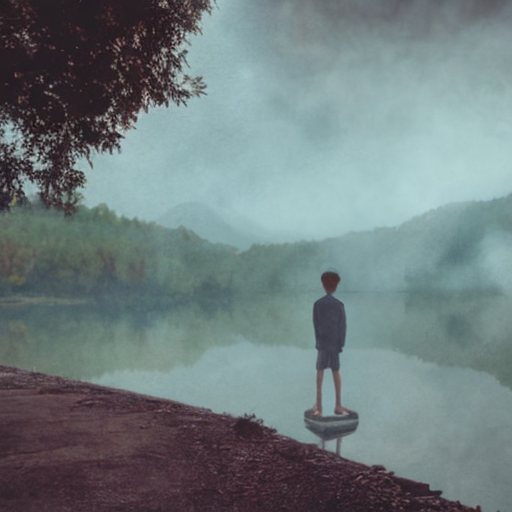

In [23]:
from IPython.display import display

# Display the generated image
display(generated_image)


In [9]:
from diffusers import StableDiffusionPipeline

# Load the more realistic Stable Diffusion model
sd_pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                                      use_auth_token=True).to(device)


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
# Modify the Stable Diffusion pipeline to generate higher resolution images
def generate_high_res_image_from_text(prompt):
    # Set a high resolution (e.g., 1024x1024)
    sd_pipeline = sd_pipeline.to(device)
    generator = torch.manual_seed(42)

    with torch.no_grad():
        image = sd_pipeline(prompt, height=1024, width=1024, guidance_scale=15).images[0]
    return image


In [11]:
# Adjust guidance scale for realism
def generate_image_from_text_with_guidance(prompt):
    guidance_scale = 15  # Higher value for more alignment with the prompt
    with torch.no_grad():
        image = sd_pipeline(prompt, guidance_scale=guidance_scale).images[0]
    return image


In [20]:
# Test the Multi-Modal AGI System
prompt = "a quiet river at sunset, vintage color palette, soft film grain, dramatic lighting, Ghibli-inspired"
generated_image = multi_modal_agi_system(prompt)

# Display the generated image
generated_image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

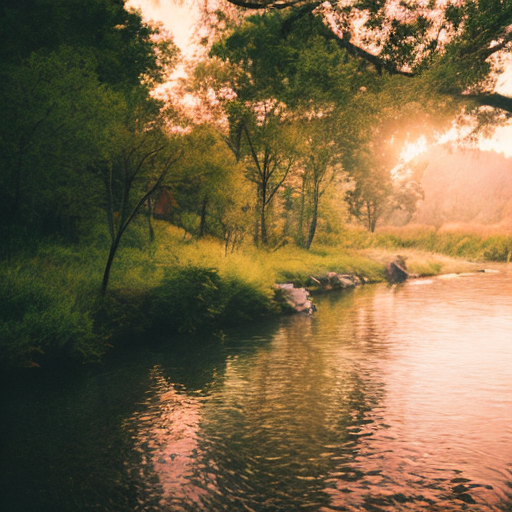

In [21]:
from IPython.display import display

# Display the generated image
display(generated_image)
